# Explore here

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from pickle import dump

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df = (
    df_raw
    .copy()
    .reindex(
        columns=(
            ['Outcome'] + 
            [c for c in df_raw.columns.to_list() if c not in ['Outcome']]
        )
    )
)

In [6]:
df.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,6,148,72,35,0,33.6,0.627,50
1,0,1,85,66,29,0,26.6,0.351,31
2,1,8,183,64,0,0,23.3,0.672,32
3,0,1,89,66,23,94,28.1,0.167,21
4,1,0,137,40,35,168,43.1,2.288,33


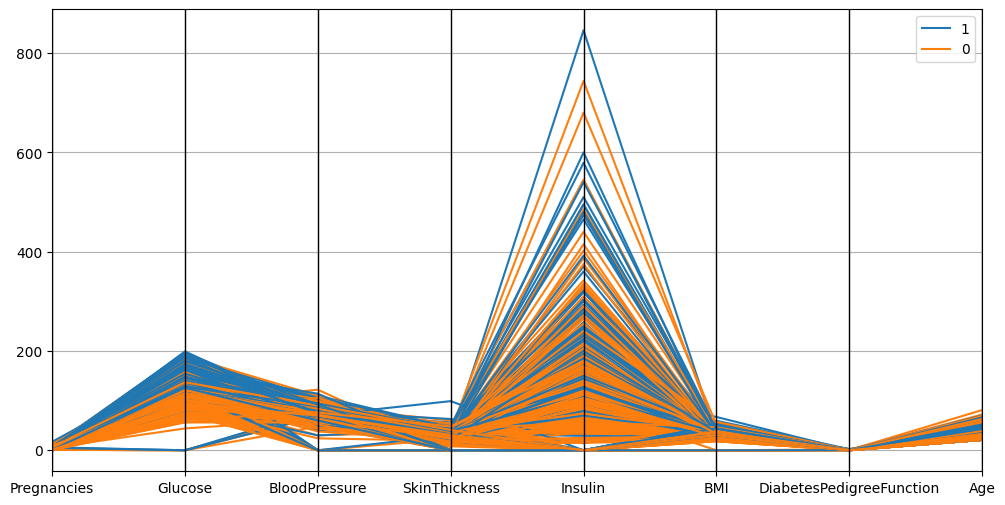

In [7]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, "Outcome", color=("#1f77b4", "#ff7f0e", "#2ca02c"))

plt.show()

In [8]:
df_train, df_test = train_test_split(df, 
                                     random_state=2024, 
                                     test_size=0.20, 
                                     stratify=df['Outcome'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 312 to 123
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


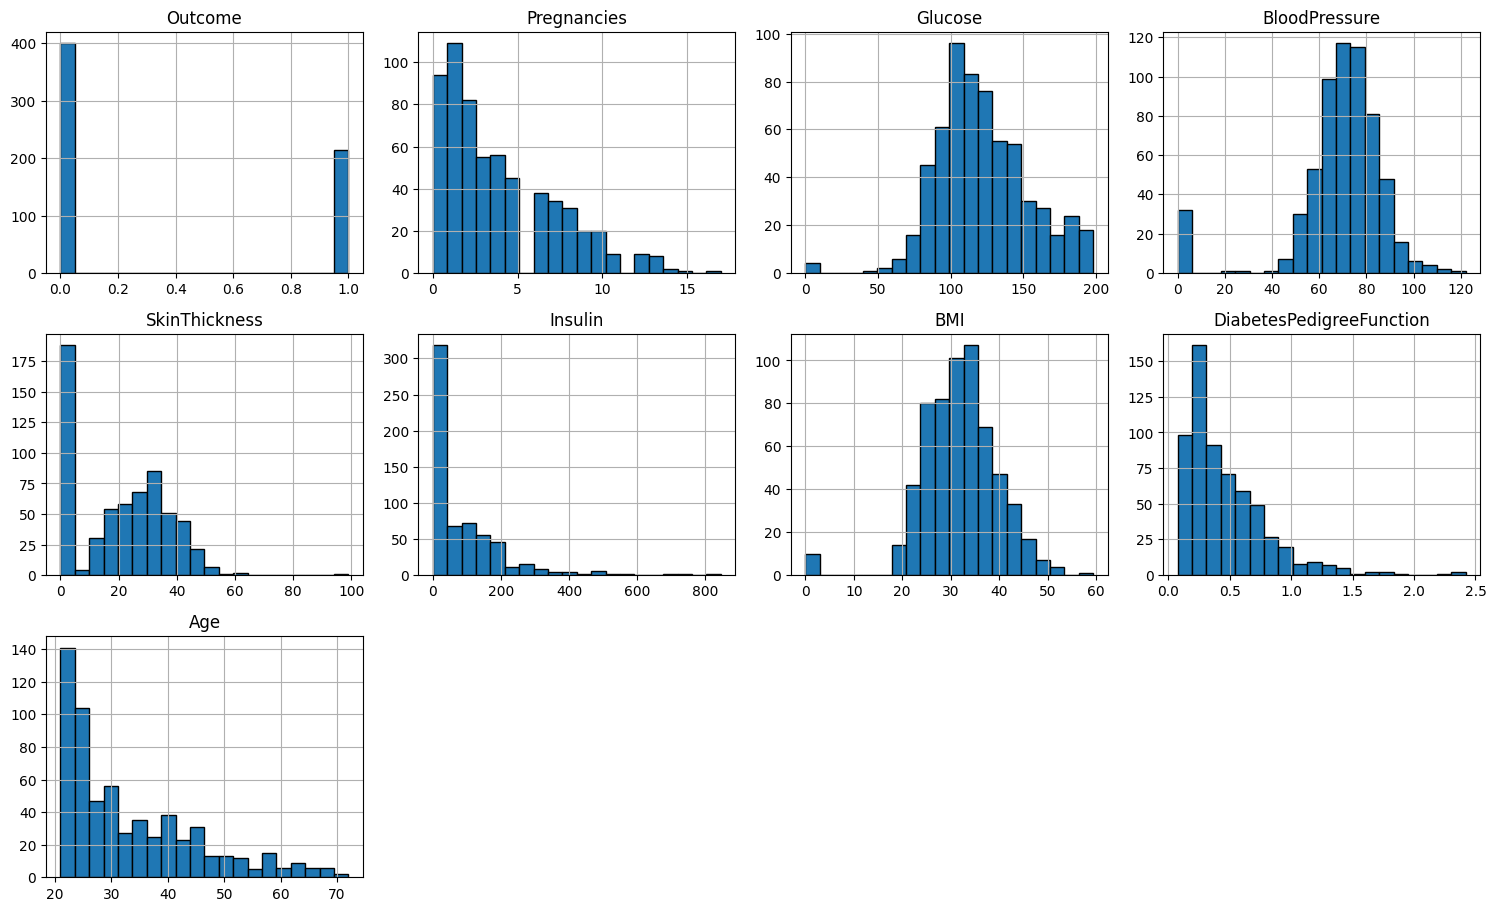

In [9]:
df_train.hist(figsize=(15, 12), bins=20, layout=(4, 4), edgecolor='black')
plt.tight_layout() 

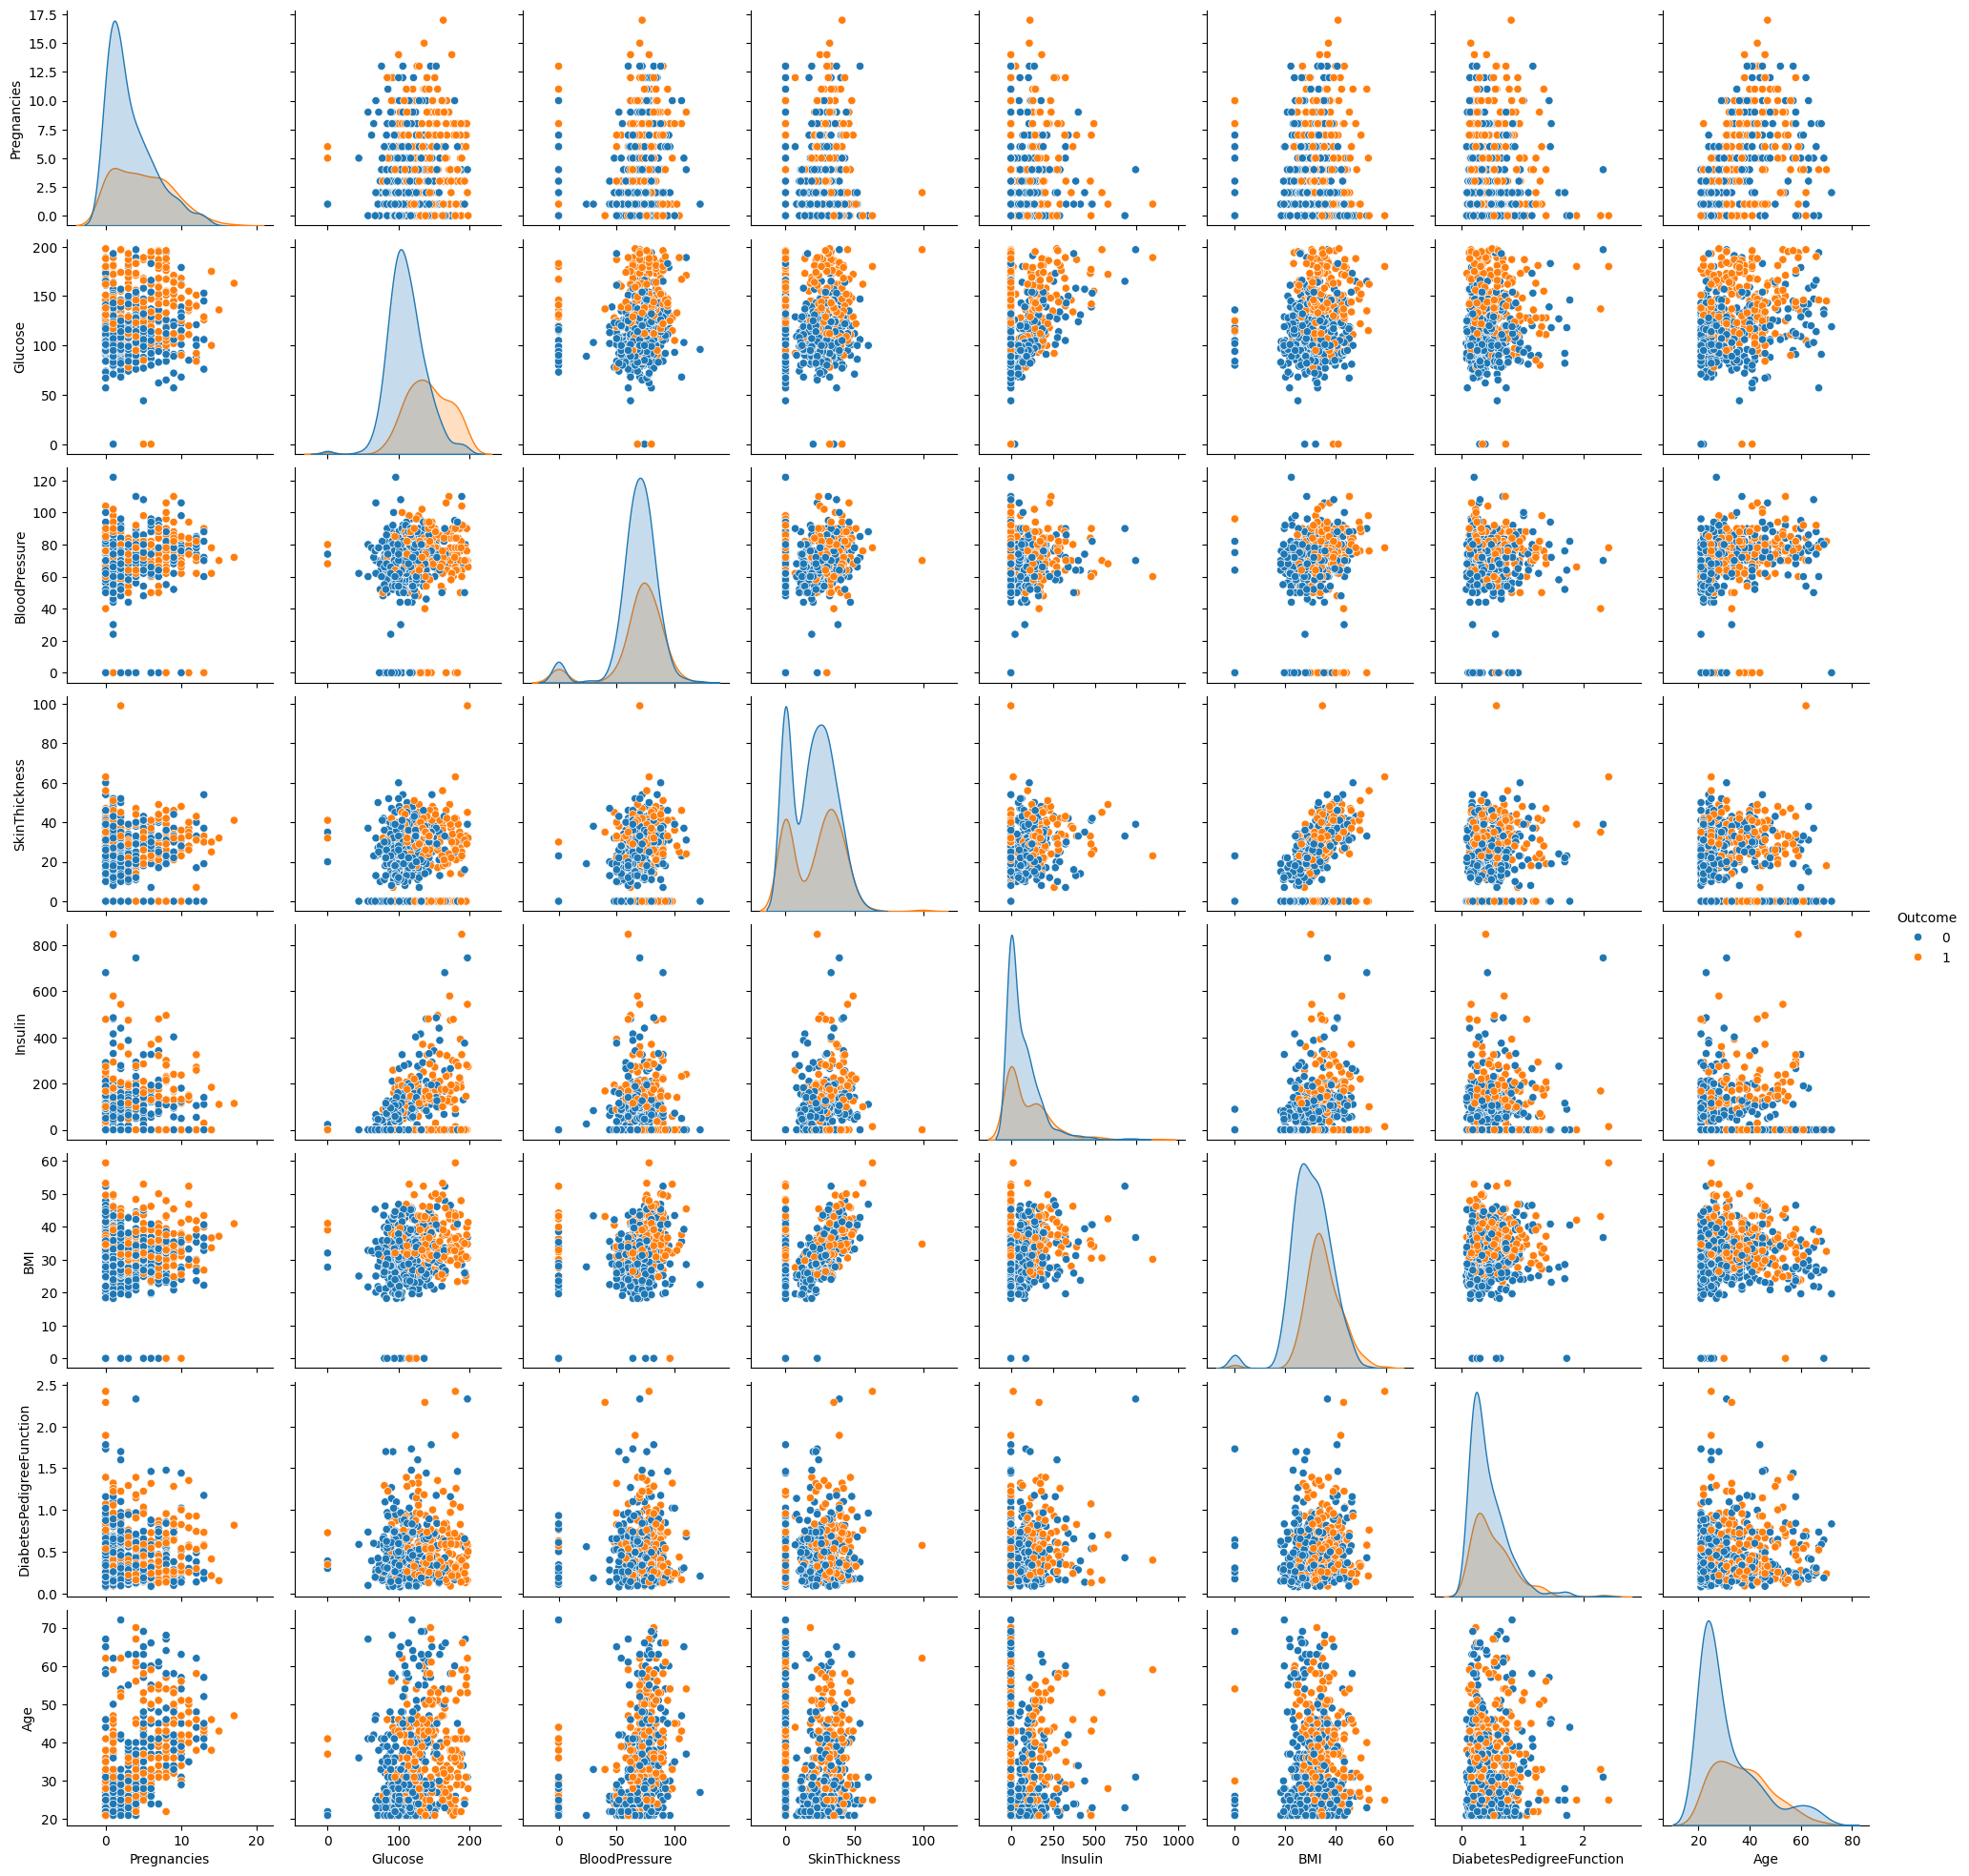

In [10]:

sns.pairplot(data=df_train, hue='Outcome')
plt.show()

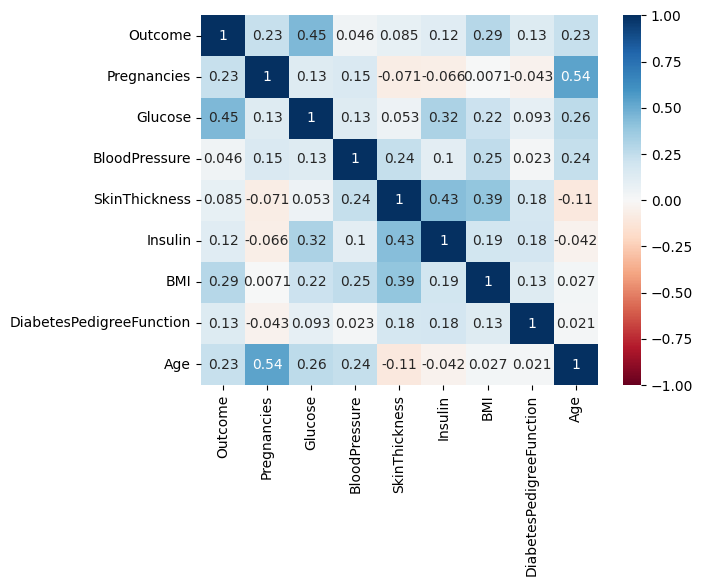

In [11]:
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.show()

In [12]:
X_train = df_train.drop('Outcome', axis=1).reset_index(drop=True)
y_train = df_train['Outcome'].reset_index(drop=True)
X_test = df_test.drop('Outcome', axis=1).reset_index(drop=True)
y_test = df_test['Outcome'].reset_index(drop=True)

In [13]:
model = DecisionTreeClassifier(random_state=2024)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2024)

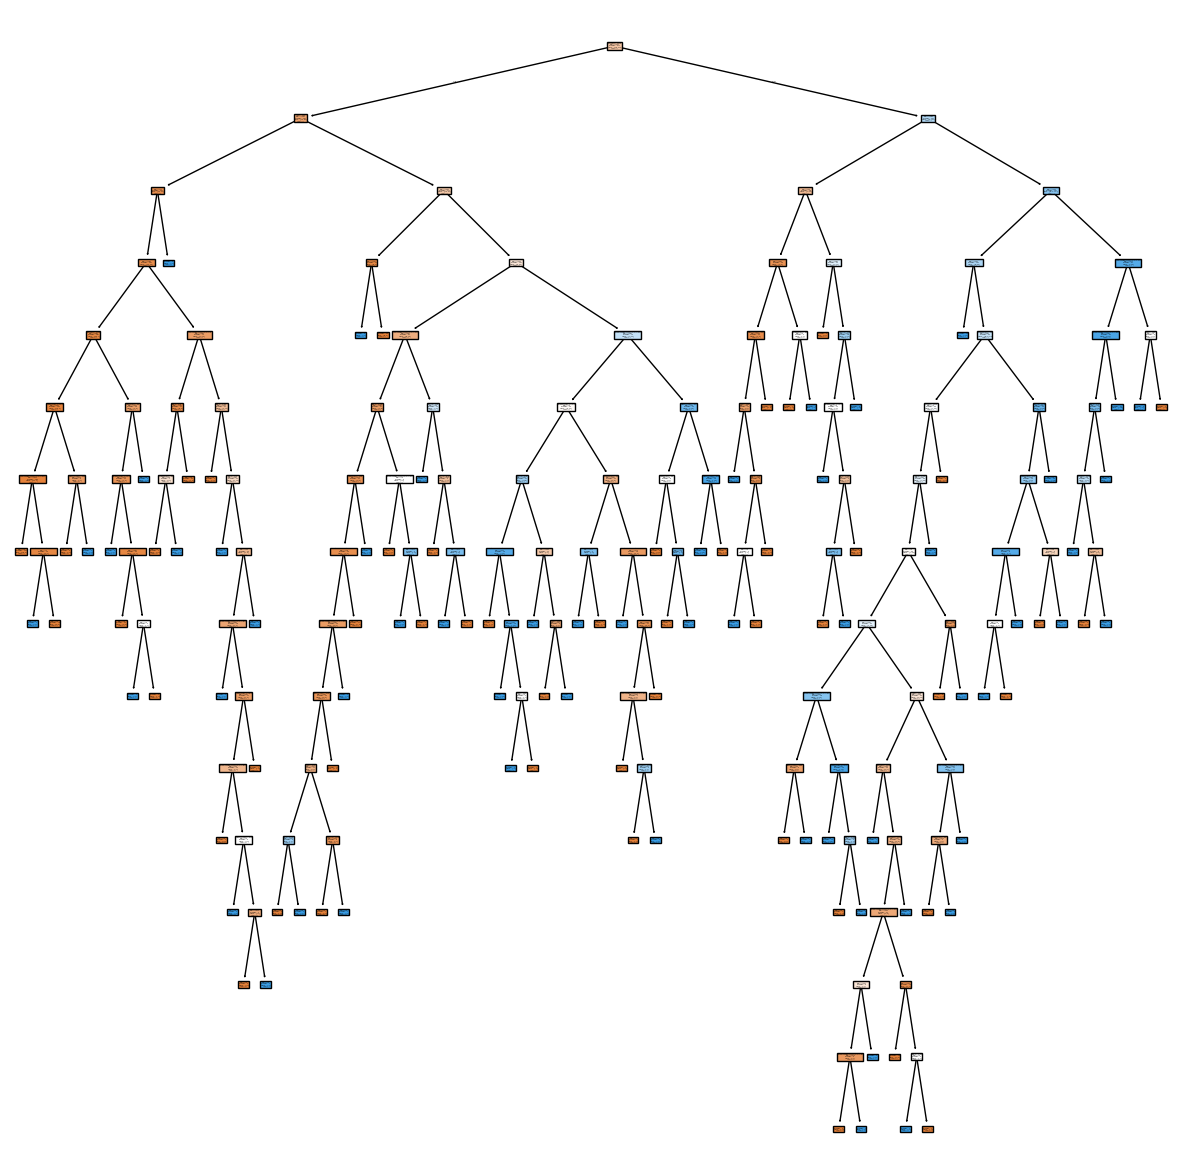

In [14]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [15]:
y_pred = model.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision:}')

Precisión del modelo: 0.7597402597402597


In [16]:
# Optimizacion del modelo

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 15, 20, None],  
    "min_samples_split": [2, 3, 4,5,10],  
    "min_samples_leaf": [1, 2, 4, 6, 8]  
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 20)
grid

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=2024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 3, 4, 5, 10]},
             scoring='accuracy')

In [17]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [18]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, min_samples_leaf = 8, min_samples_split = 2, random_state = 2024)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=2024)

In [19]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [20]:
accuracy_score(y_test, y_pred)

0.7792207792207793

In [21]:
dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))


In [22]:
model_rf = RandomForestClassifier(random_state = 2024)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=2024)

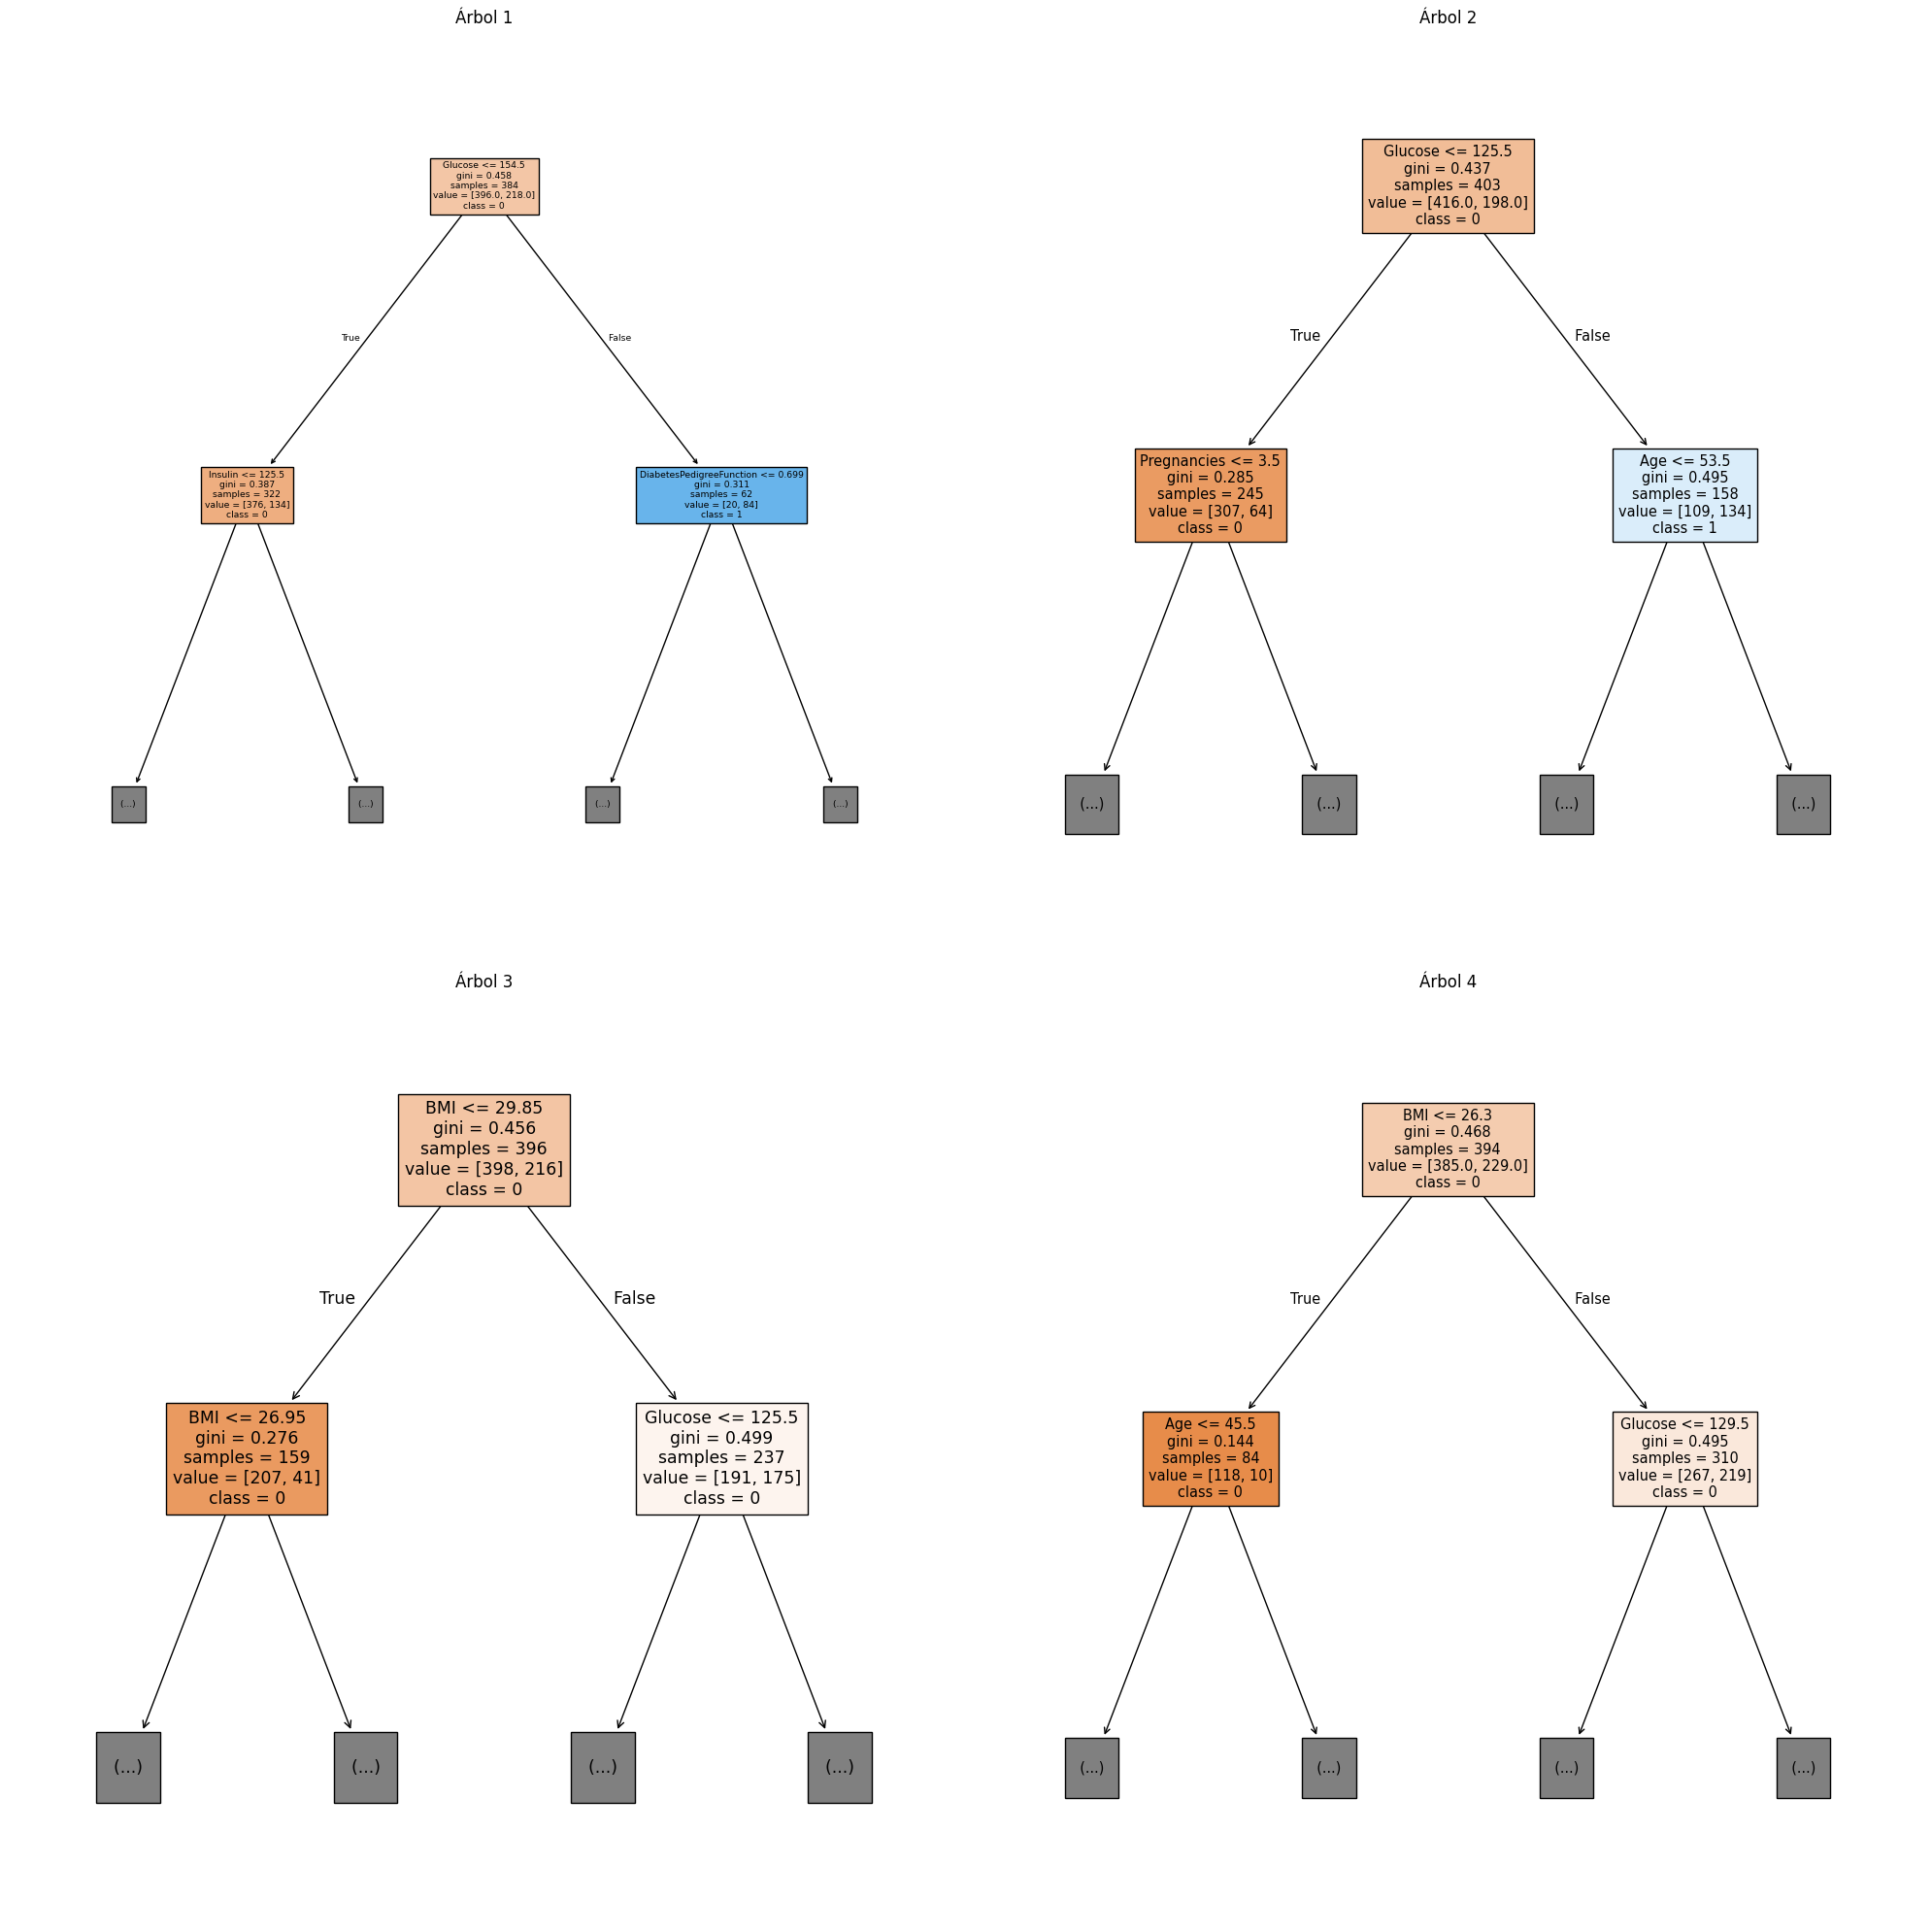

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

for i, ax in enumerate(axes.flatten()):
    if i < len(model_rf.estimators_):  # Asegurarse de no exceder la cantidad de estimadores
        tree.plot_tree(model_rf.estimators_[i], ax=ax, feature_names=list(X_train.columns), class_names=["0", "1", "2"], filled=True, max_depth=1)
        ax.set_title(f"Árbol {i+1}")

plt.tight_layout()
plt.show()

In [24]:
y_pred = model_rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [25]:
accuracy_score(y_test, y_pred)

0.8051948051948052

In [26]:

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Mean squared error: 0.19480519480519481


In [27]:
dump(model, open("random_forest_regressor_default_42.sav", "wb"))

In [28]:
model_gb = XGBClassifier(random_state = 2024)
model_gb.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2024, ...)

In [29]:
y_pred = model_gb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [30]:
accuracy_score(y_test, y_pred)

0.7467532467532467

In [31]:
model_gb.save_model("xgb_classifier_default_42.json")

In [32]:
# Boosting for regression

model_gbR = XGBRegressor(random_state = 2024)
model_gbR.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=2024, ...)

In [33]:
y_pred = model_gbR.predict(X_test)
y_pred

array([ 0.09698676,  0.13286456,  0.25279245,  0.02047511, -0.0354002 ,
        0.21775432,  0.21079737,  0.07101298,  0.04308653,  0.49170107,
       -0.03811197, -0.05223024,  0.47159153,  0.80226684,  0.7299074 ,
        0.10643127,  0.6720591 , -0.03892957,  0.07784973,  0.973501  ,
        0.6986433 ,  0.9191462 ,  0.65629643,  0.165707  ,  0.22177477,
        0.05493169,  0.01459521,  1.0040675 ,  0.37797683,  0.1705766 ,
        0.917576  ,  0.10704541,  0.88314843, -0.07585613,  0.4907508 ,
       -0.04047113,  0.8815554 ,  0.7311836 ,  0.26502886,  0.29407868,
        0.14229041, -0.09894006,  0.6519832 ,  1.0571458 ,  0.25847584,
        0.971453  ,  0.24242255,  0.4178451 ,  0.03111287, -0.02476328,
        0.1672324 ,  0.59381044,  0.7729137 ,  0.02874416,  0.8551858 ,
        0.43563724, -0.04535225,  0.23517632,  0.6894361 ,  0.31154442,
        0.04600399,  0.54605895,  0.02384579,  0.5034421 ,  0.9129321 ,
        0.5417692 ,  0.6040605 , -0.09289809,  0.02993156,  0.13

In [34]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Mean squared error: 0.16388408839702606


In [35]:
model_gbR.save_model("xgb_regressor_default_42.json")